## 1. 导入所需的包

In [1]:
import numpy as np
import os
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
from sklearn import svm

In [3]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold

## 2. 加载提取的fc7特征

In [7]:
X = np.load('data/all_images_fc7_features.npy')

In [5]:
y = np.array([i for i in xrange(21) for _ in range(100)])

## 3. 划分训练集和测试集

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.4, random_state=0, shuffle=True)

In [9]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((1260L, 4096L), (1260L,), (840L, 4096L), (840L,))

## 4. 五折交叉验证模型性能

In [10]:
clf1 = svm.SVC(kernel='linear', C=1)

In [11]:
scores = cross_val_score(clf1, X_train, y_train, cv=5)

In [12]:
scores

array([0.91923077, 0.9254902 , 0.92857143, 0.9233871 , 0.93061224])

In [13]:
scores.mean()

0.9254583471105564

## 5. 构建支持向量机分类模型

In [10]:
clf2 = svm.SVC(kernel='linear', C=1)

## 6. 模型训练

In [11]:
clf2.fit(X_train, y_train)

SVC(C=1, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

## 7. 训练好的模型在测试集上的得分（准确率）

In [13]:
clf2.score(X_test, y_test)

0.9476190476190476

## 8. 完整的端到端处理流程 - <font color='red'>即输入一张图片，得到分类结果</font>

In [14]:
import caffe

import sys
caffe_root = '../'  # this file should be run from {caffe_root}/examples (otherwise change this line)

import os

In [16]:
caffe.set_mode_cpu()

model_def = caffe_root + 'models/bvlc_reference_caffenet/deploy.prototxt'
model_weights = caffe_root + 'models/bvlc_reference_caffenet/bvlc_reference_caffenet.caffemodel'

net = caffe.Net(model_def,      # defines the structure of the model
                model_weights,  # contains the trained weights
                caffe.TEST)     # use test mode (e.g., don't perform dropout)

In [17]:
# load the mean ImageNet image (as distributed with Caffe) for subtraction
mu = np.load(caffe_root + 'python/caffe/imagenet/ilsvrc_2012_mean.npy')
mu = mu.mean(1).mean(1)  # average over pixels to obtain the mean (BGR) pixel values
print 'mean-subtracted values:', zip('BGR', mu)

# create transformer for the input called 'data'
transformer = caffe.io.Transformer({'data': net.blobs['data'].data.shape})

transformer.set_transpose('data', (2,0,1))  # move image channels to outermost dimension
transformer.set_mean('data', mu)            # subtract the dataset-mean value in each channel
transformer.set_raw_scale('data', 255)      # rescale from [0, 1] to [0, 255]
transformer.set_channel_swap('data', (2,1,0))  # swap channels from RGB to BGR

# set the size of the input (we can skip this if we're happy
#  with the default; we can also change it later, e.g., for different batch sizes)
net.blobs['data'].reshape(1,        # batch size
                          3,         # 3-channel (BGR) images
                          227, 227)  # image size is 227x227

mean-subtracted values: [('B', 104.0069879317889), ('G', 116.66876761696767), ('R', 122.6789143406786)]


### 分类（预测）函数

In [33]:
def predict_on_remote(image_path):
    #Get 
    DATASET_DIR = 'data\\images\\UCMerced_LandUse\\Images\\'
    IMAGE_CLASSES = os.listdir(DATASET_DIR)
    
    image = caffe.io.load_image(image_path)
    net.blobs['data'].data[...] = transformer.preprocess('data', image)
    plt.imshow(image)

    # perform classification
    net.forward()

    feat = net.blobs['fc7'].data[0].copy()

    pred = clf2.predict(feat.reshape(1, -1))

    print 'Prediction:\t', IMAGE_CLASSES[pred[0]]

In [50]:
test_image_path = 'data\\images\\UCMerced_LandUse\\Images\\chaparral\\'

Image:		chaparral00.tif
Prediction:	chaparral


Image:		chaparral01.tif
Prediction:	chaparral


Image:		chaparral02.tif
Prediction:	chaparral


Image:		chaparral03.tif
Prediction:	chaparral


Image:		chaparral04.tif
Prediction:	chaparral


Image:		chaparral05.tif
Prediction:	chaparral


Image:		chaparral06.tif
Prediction:	chaparral


Image:		chaparral07.tif
Prediction:	chaparral


Image:		chaparral08.tif
Prediction:	chaparral


Image:		chaparral09.tif
Prediction:	chaparral


Image:		chaparral10.tif
Prediction:	chaparral


Image:		chaparral11.tif
Prediction:	chaparral


Image:		chaparral12.tif
Prediction:	chaparral


Image:		chaparral13.tif
Prediction:	chaparral


Image:		chaparral14.tif
Prediction:	chaparral


Image:		chaparral15.tif
Prediction:	chaparral


Image:		chaparral16.tif
Prediction:	chaparral


Image:		chaparral17.tif
Prediction:	chaparral


Image:		chaparral18.tif
Prediction:	chaparral


Image:		chaparral19.tif
Prediction:	chaparral


Image:		chaparral20.tif
Prediction:	chap

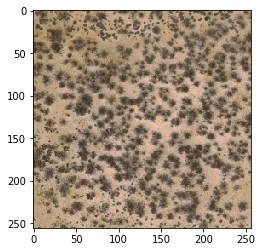

In [53]:
for test_image in os.listdir(test_image_path):
    print("Image:\t\t{}".format(test_image))
    predict_on_remote(test_image_path+test_image)
    print('\n')